We are going to use the famous iris data set for our KNN example. 


The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. 



These are the attributes of specific types of iris plant. 


The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica. 


Further details of the dataset are available here.
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

## Question

Please import, preprocess the data, train-test split, feature scale it, make predictions, and please evaluate it. 

Please also calculate the error rate for K values of 1 to 40. 

In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

The next step is to plot the error values against K values.

---
## 1) Import packages and dataset

In [28]:
# import packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing  # for label encoding of iris dataset
import matplotlib.pyplot as plt

In [2]:
# import iris dataset

iris = pd.read_csv('iris.csv')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


---
## 2) Preprocessing of data

In [3]:
# transform species labels to numbers

le = preprocessing.LabelEncoder()
le.fit(iris.species.unique())
species = le.transform(iris.species)
iris.species = species
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
# independent variables (features)
X_raw = iris.drop('species', axis=1)

# dependent variable (class = species)
y = iris.species

In [5]:
# Feature Scaling (standardize features by removing the mean and scaling to unit variance)

scaler = StandardScaler()
print(scaler.fit(X_raw))     # computes the mean and std to be used for later scaling
print(scaler.mean_)
X = scaler.transform(X_raw)  # performs standardization by centering and scaling

X = pd.DataFrame(X, columns = X_raw.columns)

StandardScaler(copy=True, with_mean=True, with_std=True)
[5.84333333 3.054      3.75866667 1.19866667]


In [6]:
# check standardization 
print(X.mean().round(2))
print(X.std().round(2))

sepal_length   -0.0
sepal_width    -0.0
petal_length    0.0
petal_width     0.0
dtype: float64
sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64


In [7]:
# train test splitting before KNN

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)  # default test size
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

## 3) KNN - first example

In [8]:
# fit KNN to training data

k = 5
knn = KNeighborsClassifier(n_neighbors= k, metric='euclidean')  # same as defaults: p=2, metric='minkowski'
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
# make predictions for testing data
y_pred = knn.predict(X_test)
y_pred, y_test.ravel()

(array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2]),
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1]))

In [10]:
(y_test != y_pred).sum()

1

In [11]:
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [12]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



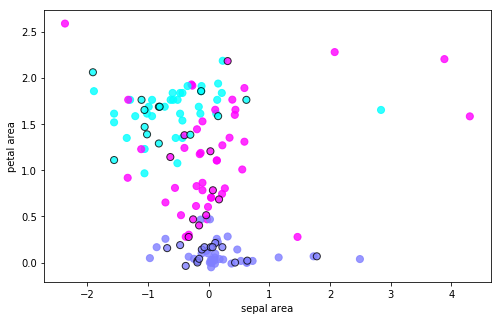

In [14]:
# check if predicted values are reasonable by plotting (without border = training data, with border = predicted data)

fig, ax = plt.subplots(figsize=(8,5))

# training points
x1_train = X_train.sepal_length * X_train.sepal_width
x2_train = X_train.petal_length * X_train.petal_width
plt.scatter(x1_train,x2_train,c=y_train,s=50, cmap='cool', alpha=0.8)

# predicted points
x1_test = X_test.sepal_length * X_test.sepal_width
x2_test = X_test.petal_length * X_test.petal_width
plt.scatter(x1_test,x2_test,c=np.array(y_pred), cmap='cool', s=50, alpha=0.8, edgecolor='k')  # , cmap='cool'

plt.xlabel('sepal area')
plt.ylabel('petal area');

## 3) KNN - try different k

In [31]:
# Calculate the error rate for K values of 1 to 40. In each iteration the mean error for 
# predicted values of test set is calculated and the result is appended to the error list

knn_errors = []    # empty list to store prediction errors
knn_mae = []       # empty list to store mean absolute errors
knn_acc = []       # empty list to store accuracy scores
knn_prec = []      # 
knn_recall = []    # 
    
for k in range(1,41):
    
    # fit KNN to training data
    knn = KNeighborsClassifier(n_neighbors= k, metric='euclidean')  # same as defaults: p=2, metric='minkowski'
    knn.fit(X_train, y_train.values.ravel())
    
    # make predictions for testing data
    y_pred = knn.predict(X_test)
    
    # calculate accuracy score, precision, and recall
    knn_acc.append(accuracy_score(y_test, y_pred))
    knn_prec.append(precision_score(y_test, y_pred, average='micro'))
    knn_recall.append(recall_score(y_test, y_pred, average='micro'))
    
    # calculate errors
    error = (y_test != y_pred).sum()
    knn_errors.append(error)
    knn_mae.append(mean_absolute_error(y_test, y_pred))

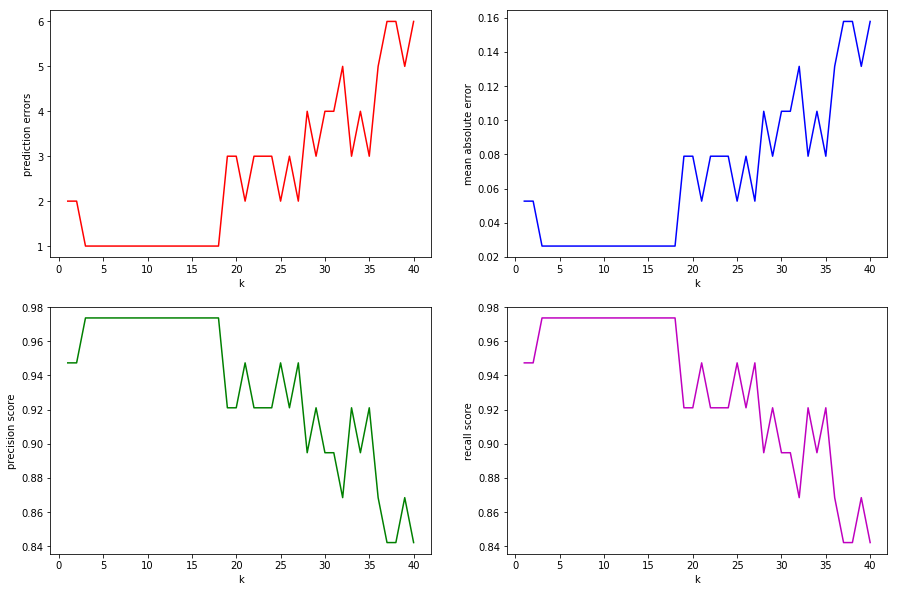

In [32]:
# plot the error values against K values

fig, ax = plt.subplots(2,2, figsize=(15,10))

plt.subplot(221)
plt.plot(np.arange(1,41), knn_errors, 'r');
plt.xlabel('k')
plt.ylabel('prediction errors')

plt.subplot(222)
plt.plot(np.arange(1,41), knn_mae, 'b');
plt.xlabel('k')
plt.ylabel('mean absolute error'); #accuracy score');

plt.subplot(223)
plt.plot(np.arange(1,41), knn_prec, 'g');
plt.xlabel('k')
plt.ylabel('precision score')

plt.subplot(224)
plt.plot(np.arange(1,41), knn_recall, 'm');
plt.xlabel('k')
plt.ylabel('recall score');



## 4) KNN - try different distance metrics

In [26]:
# Calculate the error rate for K values of 1 to 40. In each iteration the mean error for 
# predicted values of test set is calculated and the result is appended to the error list

knn_errors = []    # empty list to store prediction errors
knn_acc = []       # empty list to store accuracy scores
knn_prec = []      # 
knn_recall = []    # 

k = 5

for p in range(1,21):
    
    # fit KNN to training data
    knn = KNeighborsClassifier(n_neighbors= k, metric='minkowski', p=p)  # same as defaults: p=2, metric='minkowski'
    knn.fit(X_train, y_train.values.ravel())
    
    # make predictions for testing data
    y_pred = knn.predict(X_test)
    
    # calculate accuracy score, precision, and recall
    knn_acc.append(accuracy_score(y_test, y_pred))
    knn_prec.append(precision_score(y_test, y_pred, average='micro'))
    knn_recall.append(recall_score(y_test, y_pred, average='micro'))
    
    # calculate errors
    error = (y_test != y_pred).sum()
    mae = mean_absolute_error(y_test, y_pred)
    knn_errors.append(error)

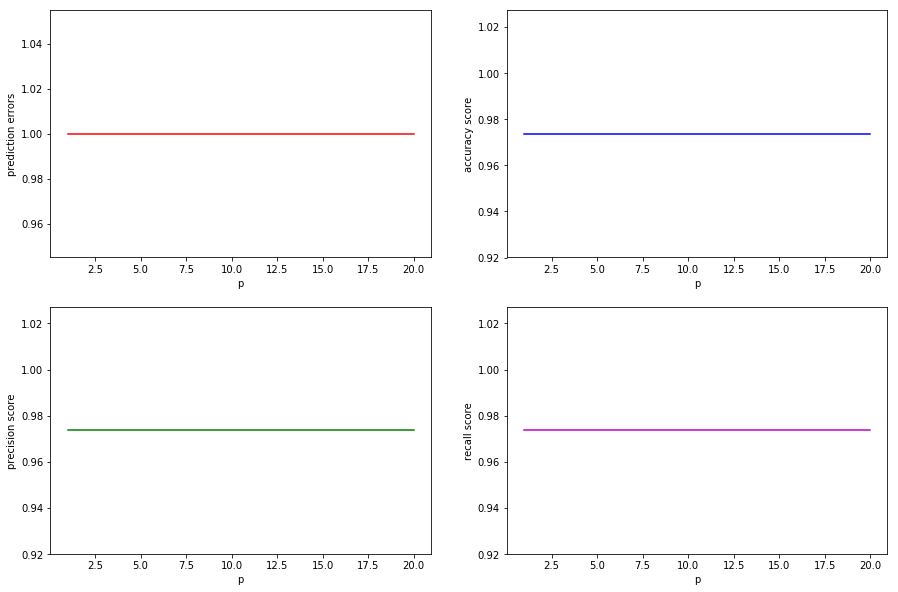

In [23]:
# plot the error values against K values

fig, ax = plt.subplots(2,2, figsize=(15,10))

plt.subplot(221)
plt.plot(np.arange(1,21), knn_errors, 'r');
plt.xlabel('p')
plt.ylabel('prediction errors')

plt.subplot(222)
plt.plot(np.arange(1,21), knn_acc, 'b');
plt.xlabel('p')
plt.ylabel('accuracy score');

plt.subplot(223)
plt.plot(np.arange(1,21), knn_prec, 'g');
plt.xlabel('p')
plt.ylabel('precision score')

plt.subplot(224)
plt.plot(np.arange(1,21), knn_recall, 'm');
plt.xlabel('p')
plt.ylabel('recall score');